In [24]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_json('train.json')
df2 = pd.read_json('test.json')
df = pd.concat([df,df2])

In [16]:
df = df[['str_words', 'tags']]

In [19]:
df.head()

,str_words,tags
0,"[Karl, Crary]","[3, 5]"
1,"[8127, Wean, Hall]","[0, 3, 0]"
2,"[School, of, Computer, Science, Carnegie, Mell...","[2, 7, 7, 7, 7, 7, 7]"
3,"[5000, Forbes, Avenue, Pittsburgh,, PA, 15213]","[1, 8, 8, 8, 8, 8]"
4,"[Phone:, (412), 268-7687, Fax:, (412), 268-557...","[0, 0, 0, 0, 0, 0, 0]"


# count which tokens appear the most frequent

In [21]:
lst = []
for index, row in df.iterrows():
    for x in row['str_words']:
        lst.append(x)
lst

['Karl',
 'Crary',
 '8127',
 'Wean',
 'Hall',
 'School',
 'of',
 'Computer',
 'Science',
 'Carnegie',
 'Mellon',
 'University',
 '5000',
 'Forbes',
 'Avenue',
 'Pittsburgh,',
 'PA',
 '15213',
 'Phone:',
 '(412)',
 '268-7687',
 'Fax:',
 '(412)',
 '268-5576',
 'crary@cs.cmu.edu',
 'Research',
 'Interests',
 'My',
 'research',
 'interests',
 'are',
 'in',
 'applying',
 'programming',
 'language',
 'technology',
 'to',
 'improve',
 'the',
 'development,',
 'maintenance,',
 'and',
 'performance',
 'of',
 'software',
 'systems.',
 'I',
 'am',
 'particularly',
 'interested',
 'in',
 'mechanization',
 'of',
 'the',
 'metatheory',
 'of',
 'programming',
 'languages,',
 'type-oriented',
 'compilation',
 'strategies,',
 'in',
 'type-based',
 'certification',
 'of',
 'machine',
 'code,',
 'and',
 'in',
 'the',
 'design',
 'of',
 'practical,',
 'high-',
 'or',
 'low-level',
 'programming',
 'languages.',
 'Publications',
 'Most',
 'of',
 'my',
 'publications',
 'are',
 'available',
 'online.',
 'Te

In [23]:
len(lst)

6424

In [53]:
#lower case all words
words = pd.DataFrame({'words':lst})
words['words'] = words['words'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#remove special characters in content
words['words'] = words['words'].str.replace(r"[^a-zA-Z\d\_\s]", "")

#filter out stopwords in the content column
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words['is_stop_words'] = words['words'].apply(lambda x: True if x in stop_words else False )
words = words[words['is_stop_words']==False]

#Reducing all words into their root words
from nltk.stem import PorterStemmer
ps = PorterStemmer()
#words['words'] = words['words'].apply(lambda x: ps.stem(x))

words

,words,is_stop_words
0,karl,False
1,crary,False
2,8127,False
3,wean,False
4,hall,False
...,...,...
6418,music,False
6419,movies,False
6420,sports,False
6422,good,False


In [55]:
words.to_csv('words.csv')

In [67]:
words = words[words['words']!='']

In [127]:
#standardize plot size and font size
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 20})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

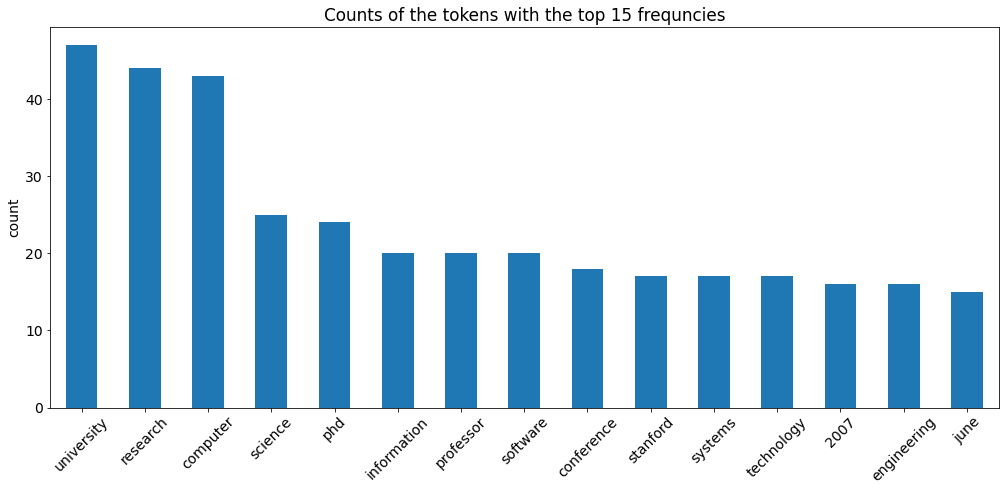

In [92]:
words['words'].value_counts()[:15].plot.bar()
plt.ylabel('count')
plt.title('Counts of the tokens with the top 15 frequncies')
plt.xticks(rotation=45)

# count which tag appears the most frequent other than 0

In [79]:
dic = {0: 'other', 1: 'location', 2: 'organization', 3: 'person', 4: 'misl', 5: 'person', 6: 'misl', 7: 'organization', 8: 'location'}
lst = []
for index, row in df.iterrows():
    for x in row['tags']:
        lst.append(dic[x])
lst

['person',
 'person',
 'other',
 'person',
 'other',
 'organization',
 'organization',
 'organization',
 'organization',
 'organization',
 'organization',
 'organization',
 'location',
 'location',
 'location',
 'location',
 'location',
 'location',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

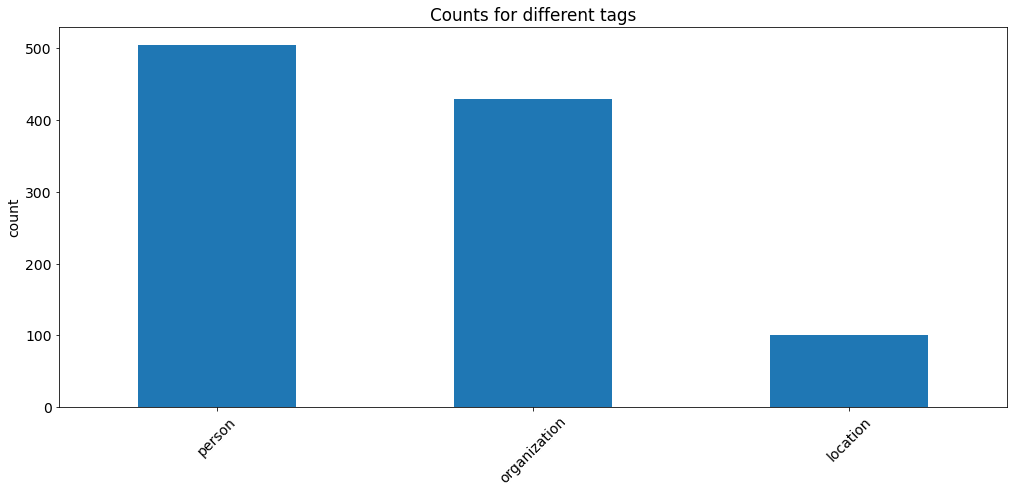

In [90]:
pd.Series(lst).to_frame()[0].value_counts()[1:].plot.bar()
plt.ylabel('count')
plt.title('Counts for different tags')
plt.xticks(rotation=45)

# count which tokens appear the most frequent that belongs to either person, organization or location

In [100]:
word_lst = []
tag_lst = []
for index, row in df.iterrows():
    for x in row['tags']:
        tag_lst.append(dic[x])
    for y in row['str_words']:
        word_lst.append(y)

In [108]:
df_cleaned = pd.DataFrame({'str_words':word_lst,'tags':tag_lst})
#lower case all words
df_cleaned['str_words'] = df_cleaned['str_words'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#remove special characters in content
df_cleaned['str_words'] = df_cleaned['str_words'].str.replace(r"[^a-zA-Z\d\_\s]", "")

#filter out stopwords in the content column
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df_cleaned['is_stop_words'] = df_cleaned['str_words'].apply(lambda x: True if x in stop_words else False )
df_cleaned = df_cleaned[df_cleaned['is_stop_words']==False]

df_cleaned = df_cleaned[df_cleaned['str_words']!='']

In [112]:
df_cleaned = df_cleaned.drop('is_stop_words', axis=1)

In [117]:
df_other = df_cleaned[df_cleaned['tags']=='other']
df_person = df_cleaned[df_cleaned['tags']=='person']
df_organization = df_cleaned[df_cleaned['tags']=='organization']
df_location = df_cleaned[df_cleaned['tags']=='location']

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

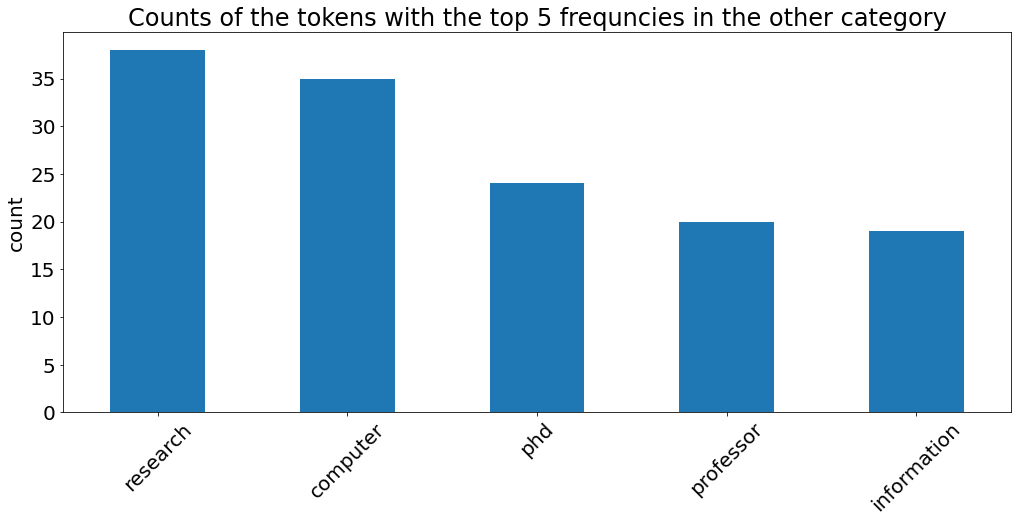

In [128]:
df_other['str_words'].value_counts()[:5].plot.bar()
plt.ylabel('count')
plt.title('Counts of the tokens with the top 5 frequncies in the other category')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

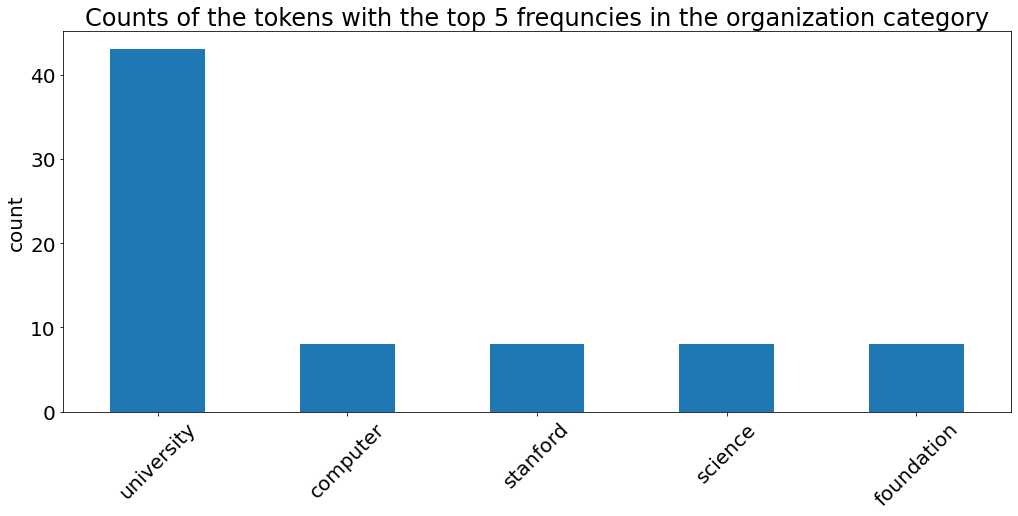

In [129]:
df_organization['str_words'].value_counts()[:5].plot.bar()
plt.ylabel('count')
plt.title('Counts of the tokens with the top 5 frequncies in the organization category')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

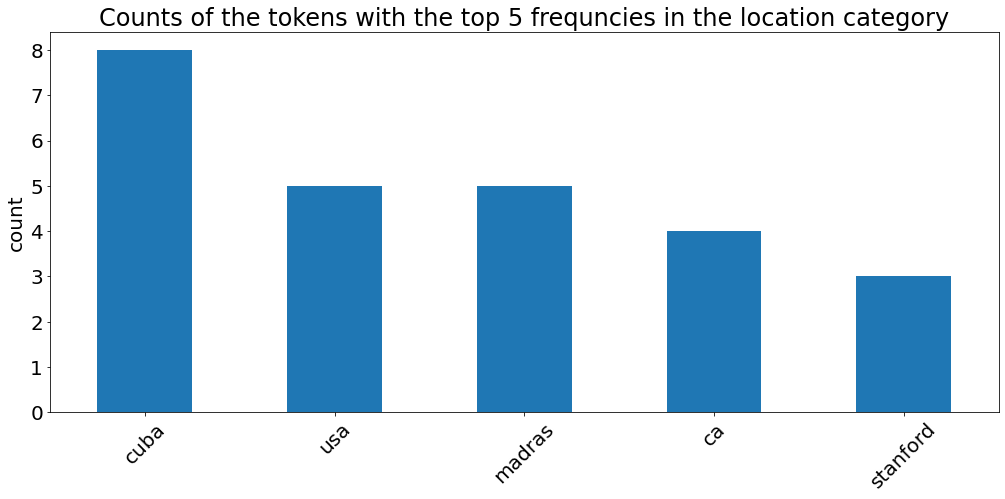

In [130]:
df_location['str_words'].value_counts()[:5].plot.bar()
plt.ylabel('count')
plt.title('Counts of the tokens with the top 5 frequncies in the location category')
plt.xticks(rotation=45)